In [ ]:
!pip install nltk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import nltk as nltk

In [ ]:
data  =  pd.read_csv("IMDB_Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
data.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
data.isna().value_counts()

,,count
review,sentiment,
False,False,50000


In [ ]:
!pip install spacy

In [ ]:
import spacy
nltk.download('stopwords')
stopwords_En = nltk.corpus.stopwords.words('english')
stopwords_En

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
!spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 10.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_sm")
data = data.drop_duplicates(subset = ['review'])

In [ ]:
import string
import re
data_sample = data.sample(n=500, random_state=42).copy()
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+","",text,flags=re.MULTILINE)
    text = text.translate(str.maketrans('', '', string.punctuation))
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stopwords_En and not token.is_punct]
    return " ".join(tokens)
data_sample['cleaned_review'] = data_sample['review'].astype(str).apply(clean_text)


In [ ]:
data_sample.head()

,review,sentiment,cleaned_review
29171,"""Soul Plane"" is a horrible attempt at comedy t...",negative,soul plane horrible attempt comedy appeal peop...
43589,Guest from the Future tells a fascinating stor...,positive,guest future tell fascinating story time trave...
38712,"""National Treasure"" (2004) is a thoroughly mis...",negative,national treasure 2004 thoroughly misguided ho...
16045,"OK. First said, I just wanted to check whether...",negative,ok first say want check whether movie average ...
5248,"I haven't always been a fan, but the show grew...",positive,not always fan show grow not season 5 start se...


In [ ]:
def analyse_syntaxe(text):
    doc = nlp(text)
    analyse = []
    for token in doc:
        analyse.append({
            "Mot": token.text,
            "POS": token.pos_,
            "TAG": token.tag_,
            "DEP": token.dep_,
            "ALPHA": token.is_alpha
        })
    return analyse
syntax = data_sample['cleaned_review'].astype(str).apply(analyse_syntaxe)


In [ ]:
syntax_df = pd.DataFrame(syntax)
syntax_df.head()

,cleaned_review
29171,"[{'Mot': 'soul', 'POS': 'NOUN', 'TAG': 'NN', '..."
43589,"[{'Mot': 'guest', 'POS': 'PROPN', 'TAG': 'NNP'..."
38712,"[{'Mot': 'national', 'POS': 'ADJ', 'TAG': 'JJ'..."
16045,"[{'Mot': 'ok', 'POS': 'INTJ', 'TAG': 'UH', 'DE..."
5248,"[{'Mot': 'not', 'POS': 'PART', 'TAG': 'RB', 'D..."


In [ ]:
from collections import Counter
all_pos = [token['POS'] for review in syntax_df['cleaned_review'] for token in review]
all_pos_count = Counter(all_pos)
print(all_pos_count)

Counter({'NOUN': 24178, 'VERB': 10193, 'ADJ': 10107, 'PROPN': 9710, 'ADV': 5042, 'NUM': 1478, 'AUX': 1105, 'ADP': 859, 'PART': 691, 'PRON': 645, 'SPACE': 452, 'SCONJ': 415, 'INTJ': 359, 'DET': 224, 'CCONJ': 94, 'X': 73, 'SYM': 1, 'PUNCT': 1})


On remarque que les noms sont les plus nombreux.
L'abondance des verbes et adjectifs montrent que les critiques contiennent beaucoup d'opinions subjectives.
Les adverbes sont aussi importants. Ils peuvent modifier l'intensité des avis

In [ ]:
all_dep = [token['DEP'] for review in syntax_df['cleaned_review'] for token in review]
all_dep_count = Counter(all_dep)
print(all_dep_count)

Counter({'compound': 17974, 'amod': 9934, 'nsubj': 6776, 'advmod': 5263, 'dobj': 4663, 'ccomp': 4537, 'nmod': 2834, 'npadvmod': 1309, 'nummod': 1306, 'advcl': 1275, 'conj': 1232, 'aux': 1078, 'prep': 963, 'pobj': 826, 'neg': 810, 'xcomp': 764, 'dep': 756, 'ROOT': 703, 'appos': 483, 'mark': 323, 'intj': 297, 'relcl': 248, 'det': 227, 'acl': 160, 'acomp': 153, 'dative': 138, 'oprd': 124, 'pcomp': 75, 'attr': 68, 'csubj': 56, 'cc': 49, 'parataxis': 44, 'prt': 43, 'punct': 42, 'preconj': 36, 'poss': 27, 'auxpass': 13, 'quantmod': 10, 'nsubjpass': 5, 'meta': 3})


Le fait que les coumpound soient aussi nombreux indique que les critiques décrivent souvent les films avec plusieurs mots combinés.
Pour les amod (modificateur adjectival) cela signifie beaucoup de critiques utilisent des adjectifs pour qualifier des noms
nsubj(sujet nominal) confirme que les critiques ont des structures grammaticalement bien définies.

In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data['cleaned_review'] = data['review'].astype(str).apply(clean_text)

In [ ]:
data['tokenized_review'] = data['cleaned_review'].astype(str).apply(lambda x: x.split())

In [ ]:
model = Word2Vec(sentences=data['tokenized_review'], vector_size=100, window=5, min_count=5, workers=4)

In [ ]:
print(f"mot appris: {list(model.wv.index_to_key)[:20]}")

mot appris: ['br', 'movie', 'film', 'not', 'one', 'see', 'make', 'like', 'good', 'get', 'well', 'time', 'character', 'go', 'watch', 'would', 'bad', 'even', 'story', 'really']


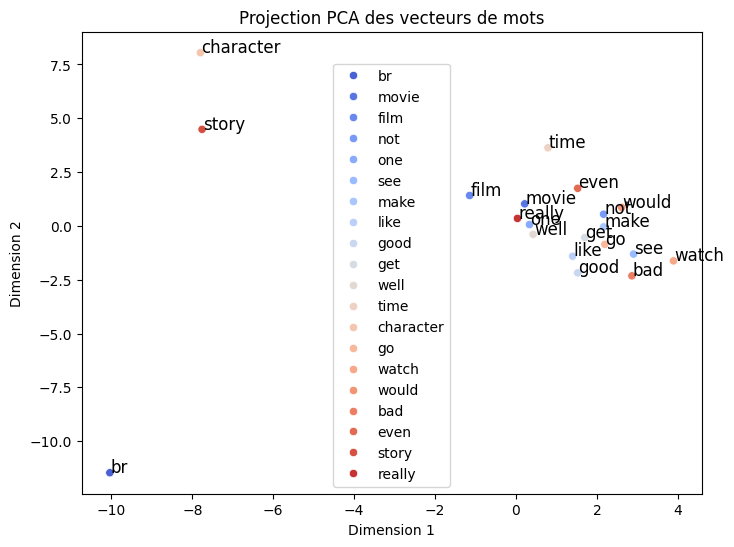

In [ ]:
def plot_word_vectors(model,words):
    word_vectors = np.array([model.wv[word] for word in words if word in model.wv])
    pca = PCA(n_components=2)
    reducted_vectors = pca.fit_transform(word_vectors)
    plt.figure(figsize=(8,6))
    sn.scatterplot(x=reducted_vectors[:,0], y=reducted_vectors[:,1], hue=words, palette="coolwarm")
    for word, (x,y) in zip(words, reducted_vectors):
      plt.text(x+0.02, y+0.02, word, fontsize = 12)
    plt.title("Projection PCA des vecteurs de mots")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

word_to_plot = ['br', 'movie', 'film', 'not', 'one', 'see', 'make', 'like', 'good', 'get', 'well', 'time', 'character', 'go', 'watch', 'would', 'bad', 'even', 'story', 'really']
plot_word_vectors(model, word_to_plot)

On peut remarqué que les mots "well" et "really" sont presque au même point. Ce qui signifie qu'ils ont des utilisations très frequentes ensemble dans les critiques. Cela est dû au fait qu'ils sont souvent utilisés dans le même contexte c'est à dire intensifier une opinion.
On voit aussi que movie, film, character, story sont relativement proches. CEla veut dire qu'eux aussi sont souvent utilisé ensemble.
On peut dire que les critiques parlent souvent des personnages et du scénario dans le même contexte.
Good et bad sont bien distinctes dans l'espace. Ce qui veut dire que le moèle distingue correctement les avis positifs et négatifs.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def get_review_vector(tokens, model):
  valid_tokens = [token for token in tokens if token in model.wv]
  if valid_tokens:
    return np.mean([model.wv[token] for token in valid_tokens], axis=0)
  else:
    return np.zeros(model.vector_size)

data['review_vector'] = data["tokenized_review"].apply(lambda tokens: get_review_vector(tokens, model))

review_vectors = np.vstack(data["review_vector"].values)
similary_matrix = cosine_similarity(review_vectors)

In [ ]:
similar_pairs = np.unravel_index(np.argsort(similary_matrix, axis=None)[-10:], similary_matrix.shape)
simila_reviews = [(data.iloc[i]["cleaned_review"], data.iloc[j]["cleaned_review"], similarity_matrix[i,j]) for i, j in zip(similar_pairs[0], similar_pairs[1]) if i != j]

In [ ]:
simila_reviews_df = pd.DataFrame(simila_reviews, columns= ["Critique 1", "Critique 2", "Similarité"])
simila_reviews_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = np.vstack(data["review_vector"].values)
y = data["sentiment"].map({"positif": 1, "négatif": 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =42, stratify=y)
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("Précision du modèle: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names = ["Négatif", "Positif"]))